Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


Process of Loading Dataset

In [4]:
# Load data
df = pd.read_csv("creditcard.csv")

# Drop rows where 'Class' is NaN
df.dropna(subset=['Class'], inplace=True)

X = df.drop("Class", axis=1)
y = df["Class"]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


MODEL 1: BASIC 1D CNN

In [5]:
model_basic = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_basic.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_basic.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

y_pred = model_basic.predict(X_test)
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8935 - loss: 0.2606 - val_accuracy: 0.9971 - val_loss: 0.0390
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9956 - loss: 0.0449 - val_accuracy: 0.9969 - val_loss: 0.0132
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9968 - loss: 0.0156 - val_accuracy: 0.9973 - val_loss: 0.0113
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9977 - loss: 0.0088 - val_accuracy: 0.9978 - val_loss: 0.0105
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9979 - loss: 0.0091 - val_accuracy: 0.9978 - val_loss: 0.0094
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9980 - loss: 0.0098 - val_accuracy: 0.9978 - val_loss: 0.0088
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9972 - loss: 0.0095 - val_accuracy: 0.9978 - val_loss: 0.0083
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9972 - loss: 0.0112 - val_accuracy: 0.9978 - val_loss: 0.

MODEL 2: DEEP CNN

In [6]:
model_deep = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.4),

    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_deep.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_deep.fit(X_train, y_train, epochs=12, batch_size=256, validation_split=0.2)


Epoch 1/12


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9620 - loss: 0.1976 - val_accuracy: 0.9971 - val_loss: 0.0297
Epoch 2/12
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9968 - loss: 0.0240 - val_accuracy: 0.9971 - val_loss: 0.0093
Epoch 3/12
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9963 - loss: 0.0085 - val_accuracy: 0.9978 - val_loss: 0.0082
Epoch 4/12
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9972 - loss: 0.0064 - val_accuracy: 0.9976 - val_loss: 0.0080
Epoch 5/12
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9978 - val_loss: 0.0069
Epoch 6/12
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9975 - loss: 0.0049 - val_accuracy: 0.9978 - val_loss: 0.0072
Epoch 7/12
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 0.9981 - val_loss: 0.0066
Epoch 8/12
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9982 - loss: 0.0061 - val_accuracy: 0.9981 - val_loss: 0.

MODEL 3: CNN + DENSE (HYBRID MODEL)

In [7]:
model_hybrid = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_hybrid.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_hybrid.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8759 - loss: 0.2940 - val_accuracy: 0.9971 - val_loss: 0.0327
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9959 - loss: 0.0381 - val_accuracy: 0.9971 - val_loss: 0.0104
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9974 - loss: 0.0120 - val_accuracy: 0.9978 - val_loss: 0.0093
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9976 - loss: 0.0080 - val_accuracy: 0.9978 - val_loss: 0.0084
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9980 - loss: 0.0067 - val_accuracy: 0.9978 - val_loss: 0.0079
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9979 - loss: 0.0067 - val_accuracy: 0.9978 - val_loss: 0.0076
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9980 - loss: 0.0079 - val_accuracy: 0.9978 - val_loss: 0.0075
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9981 - loss: 0.0058 - val_accuracy: 0.9976 - val_loss: 0.

MODEL 4: LIGHTWEIGHT CNN (MobileNet-Style)

In [8]:
model_light = Sequential([
    Conv1D(16, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),

    Conv1D(32, 3, activation='relu'),
    MaxPooling1D(2),

    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_light.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_light.fit(X_train, y_train, epochs=10, batch_size=256)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9305 - loss: 0.2713
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9965 - loss: 0.0457
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9974 - loss: 0.0182
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9979 - loss: 0.0099
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9982 - loss: 0.0072
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9985 - loss: 0.0054
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9988 - loss: 0.0060
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9987 - loss: 0.0050
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9987 - loss: 0.0046
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9996 - loss: 0.0024


MODEL 5: REGULARIZED CNN (BEST FOR IMBALANCED DATA)

In [9]:
model_reg = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.5),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_reg.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

class_weight = {0: 1, 1: 20}

model_reg.fit(
    X_train, y_train,
    epochs=12,
    batch_size=256,
    class_weight=class_weight
)


Epoch 1/12


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9654 - loss: 0.5192
Epoch 2/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9976 - loss: 0.1111
Epoch 3/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9972 - loss: 0.0981
Epoch 4/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9981 - loss: 0.0903
Epoch 5/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9984 - loss: 0.0429
Epoch 6/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9972 - loss: 0.0589
Epoch 7/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9983 - loss: 0.0485
Epoch 8/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9981 - loss: 0.0385
Epoch 9/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9977 - loss: 0.0342
Epoch 10/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9976 - loss: 0.0415
Epoch 11/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9982 - loss: 0.0267
Epoch 12/12
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9969 - l

COMMON EVALUATION CODE

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.3),

    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 28, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 12, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,041 (121.25 KB)

 Trainable params: 31,041 (121.25 KB)

 Non-trainable params: 0 (0.00 B)

Re-train the model

In [11]:
class_weight = {0: 1, 1: 20}

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=256,
    validation_split=0.2,
    class_weight=class_weight,
    verbose=1
)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9520 - loss: 0.5722 - val_accuracy: 0.9976 - val_loss: 0.0482
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9983 - loss: 0.0869 - val_accuracy: 0.9978 - val_loss: 0.0336
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9986 - loss: 0.0671 - val_accuracy: 0.9969 - val_loss: 0.0555
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9976 - loss: 0.0706 - val_accuracy: 0.9978 - val_loss: 0.0222
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9980 - loss: 0.0731 - val_accuracy: 0.9976 - val_loss: 0.0257
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9986 - loss: 0.0396 - val_accuracy: 0.9976 - val_loss: 0.0197
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9981 - loss: 0.0596 - val_accuracy: 0.9976 - val_loss: 0.0199
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9969 - loss: 0.0570 - val_accuracy: 0.9971 - v

Plotting the history curve

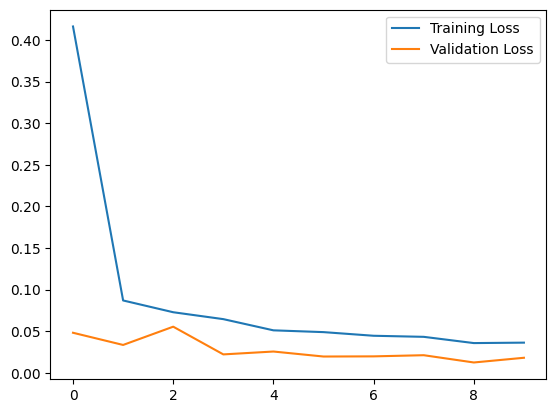

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


Plot Training Curves

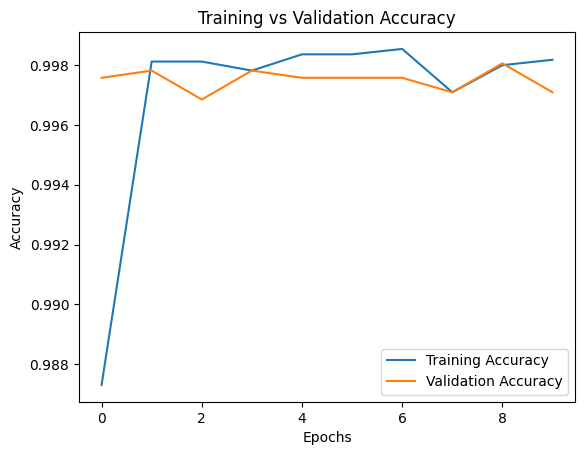

In [13]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Evaluating Prediction

In [14]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Plotting Confusion Matrix

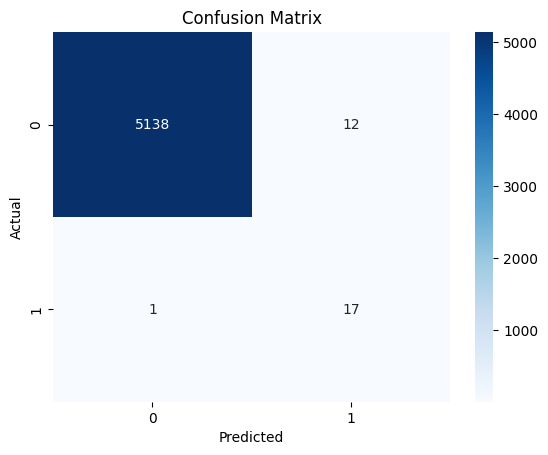

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Calculating the evaluation matrics

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5150
         1.0       0.59      0.94      0.72        18

    accuracy                           1.00      5168
   macro avg       0.79      0.97      0.86      5168
weighted avg       1.00      1.00      1.00      5168



Plotting Roc curve

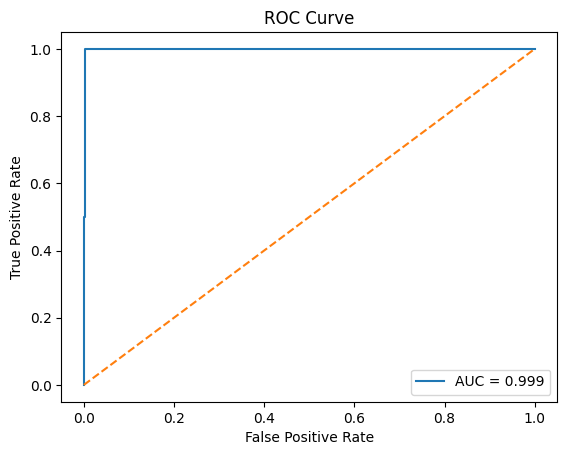

ROC-AUC Score: 0.9990399137001079


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC Score:", auc_score)


Implementing model on threshold value for real time exposure

In [18]:
threshold = 0.3
y_pred_custom = (y_pred_prob > threshold).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[5130   20]
 [   0   18]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5150
         1.0       0.47      1.00      0.64        18

    accuracy                           1.00      5168
   macro avg       0.74      1.00      0.82      5168
weighted avg       1.00      1.00      1.00      5168



Quick check security

In [19]:
print(model)


<Sequential name=sequential_5, built=True>


Implementing SMOTE comparison for handling imbalanced data

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

print("Before:", y.value_counts())
print("After:", pd.Series(y_res).value_counts())


Before: Class
0.0    25749
1.0       88
Name: count, dtype: int64
After: Class
0.0    25749
1.0    25749
Name: count, dtype: int64


Evaluating Metric on SMOTE comparison

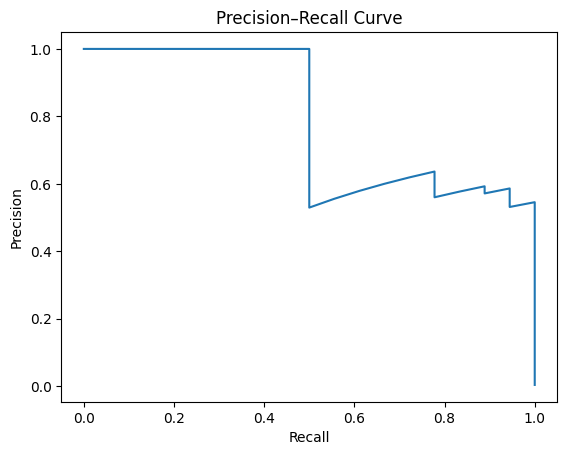

In [21]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.show()


Printing Threshold value

In [23]:
thresholds = np.arange(0.1, 0.9, 0.1)

for t in thresholds:
    y_pred_t = (y_pred_prob > t).astype(int)
    print(t, classification_report(y_test, y_pred_t, output_dict=True)['1.0']['recall'])


0.1 1.0
0.2 1.0
0.30000000000000004 1.0
0.4 0.9444444444444444
0.5 0.9444444444444444
0.6 0.9444444444444444
0.7000000000000001 0.9444444444444444
0.8 0.8888888888888888


Feature importance using shap(advanced)

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_42
Received: inputs=['Tensor(shape=(100, 30, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_42
Received: inputs=['Tensor(shape=(200, 30, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_42
Received: inputs=['Tensor(shape=(50, 30, 1))']
 

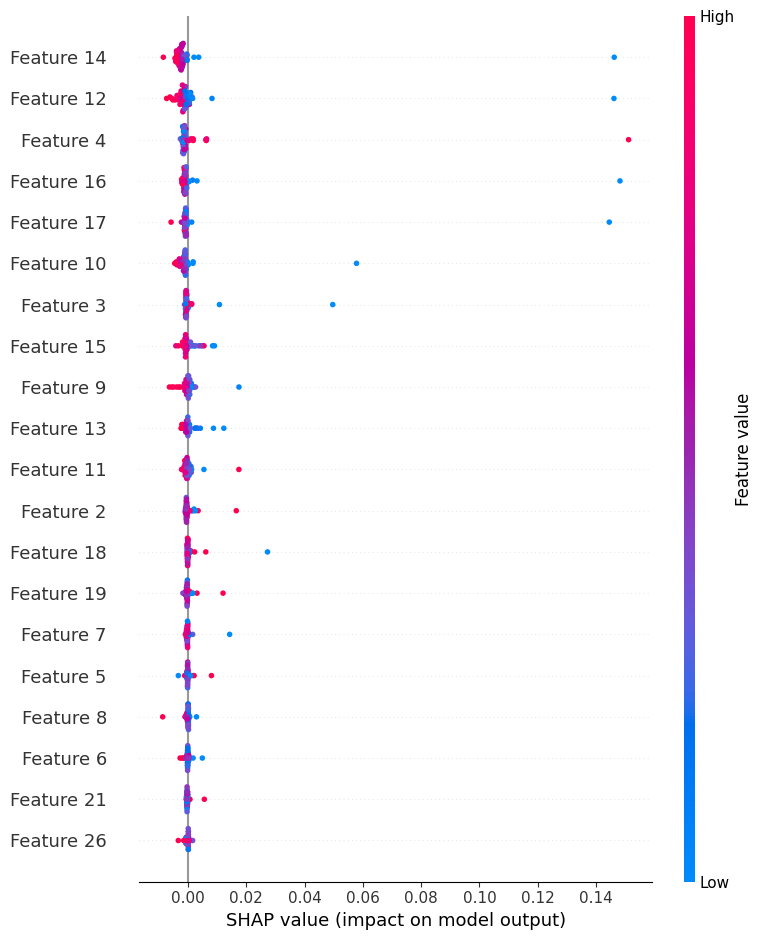

In [24]:
import shap
import numpy as np

explainer = shap.DeepExplainer(model, X_train[:100])
shap_values = explainer.shap_values(X_test[:50])

# DeepExplainer for a single-output model often returns a list containing one array
# If it's a list, extract the array. Otherwise, proceed with the array directly.
if isinstance(shap_values, list):
    # For binary classification, we typically take the SHAP values for the positive class (index 0 for a single output)
    shap_values = shap_values[0]

# Squeeze the shap_values to remove any dimensions of size 1 (e.g., from (50, 30, 1, 1) to (50, 30))
shap_values_squeezed = np.squeeze(shap_values)

# Squeeze X_test to remove the last dimension of size 1 (e.g., from (50, 30, 1) to (50, 30))
X_test_squeezed = np.squeeze(X_test[:50])

shap.summary_plot(shap_values_squeezed, X_test_squeezed)

Model saving and reloading

In [25]:
model.save("cnn_fraud_model.h5")

loaded_model = tf.keras.models.load_model("cnn_fraud_model.h5")


Model comparison libraries

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, recall_score


Logistic Regression model evaluation

In [27]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]), y_train)

y_pred_lr = lr.predict(X_test.reshape(X_test.shape[0], X_test.shape[1]))
y_prob_lr = lr.predict_proba(X_test.reshape(X_test.shape[0], X_test.shape[1]))[:, 1]

lr_auc = roc_auc_score(y_test, y_prob_lr)
lr_recall = recall_score(y_test, y_pred_lr)

KNN  classifier Model Evaluation

In [28]:
import numpy as np

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(np.squeeze(X_train), y_train)

y_pred_knn = knn.predict(np.squeeze(X_test))
y_prob_knn = knn.predict_proba(np.squeeze(X_test))[:, 1]

knn_auc = roc_auc_score(y_test, y_prob_knn)
knn_recall = recall_score(y_test, y_pred_knn)

Decision Tree model Evaluation

In [29]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(np.squeeze(X_train), y_train)

y_pred_dt = dt.predict(np.squeeze(X_test))
y_prob_dt = dt.predict_proba(np.squeeze(X_test))[:, 1]

dt_auc = roc_auc_score(y_test, y_prob_dt)
dt_recall = recall_score(y_test, y_pred_dt)

Model comparison using roc-auc

In [30]:
cnn_auc = roc_auc_score(y_test, y_pred_prob)
cnn_recall = recall_score(y_test, y_pred)

comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "KNN",
        "Decision Tree",
        "CNN"
    ],
    "ROC-AUC Score": [
        lr_auc,
        knn_auc,
        dt_auc,
        cnn_auc
    ],
    "Recall (Fraud)": [
        lr_recall,
        knn_recall,
        dt_recall,
        cnn_recall
    ]
})

print(comparison_df)

                 Model  ROC-AUC Score  Recall (Fraud)
0  Logistic Regression       0.996710        0.777778
1                  KNN       0.999709        0.777778
2        Decision Tree       0.860998        0.777778
3                  CNN       0.999040        0.944444


Plotting Bar graph for different model

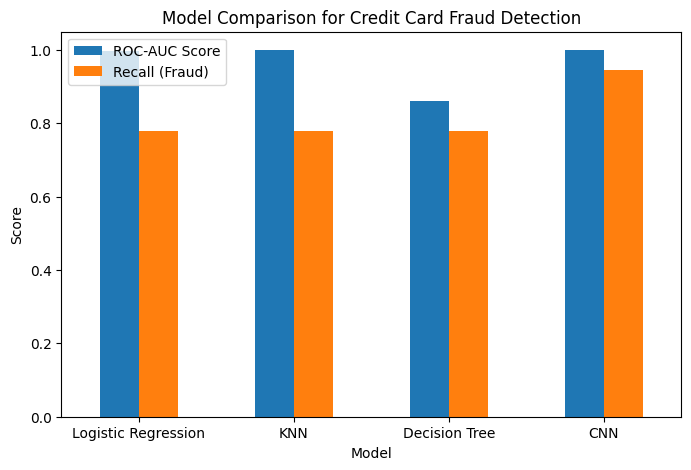

In [31]:
comparison_df.set_index("Model")[["ROC-AUC Score", "Recall (Fraud)"]].plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("Model Comparison for Credit Card Fraud Detection")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

In [32]:
import joblib

model.save("cnn_fraud_model.h5")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [33]:
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'pd', 'np', 'train_test_split', 'StandardScaler', 'classification_report', 'confusion_matrix', 'roc_auc_score', 'tf', 'Sequential', 'Conv1D', 'MaxPooling1D', 'Flatten', 'Dense', 'Dropout', '_i2', 'df', 'X', 'y', 'scaler', 'X_scaled', '_i3', '_i4', 'X_train', 'X_test', 'y_train', 'y_test', '_i5', 'model_basic', 'y_pred', '_i6', 'model_deep', '_6', '_i7', 'model_hybrid', '_7', '_i8', 'model_light', '_8', '_i9', 'model_reg', 'class_weight', '_9', '_i10', 'model', '_i11', 'history', '_i12', 'plt', '_i13', '_i14', 'y_pred_prob', '_i15', 'sns', 'cm', '_i16', '_i17', 'roc_curve', 'fpr', 'tpr', 'auc_score', '_i18', 'threshold', 'y_pred_custom', '_i19', '_i20', 'SMOTE', 'sm', 'X_res', 'y_res', '_i21', 'precision_recall_curve', 'precision', 'recall', '_i22', 'thresholds', 't', 'y_pr

In [34]:
!ls


cnn_fraud_model.h5  creditcard.csv  sample_data  scaler.pkl


In [35]:
import tensorflow as tf
import joblib

loaded_model = tf.keras.models.load_model("cnn_fraud_model.h5")
loaded_scaler = joblib.load("scaler.pkl")

print("Model and scaler loaded successfully")


Model and scaler loaded successfully


In [36]:
import numpy as np

def predict_transaction(features):
    data = np.array(features).reshape(1, -1)
    data = loaded_scaler.transform(data)
    data = data.reshape(1, data.shape[1], 1)

    probability = loaded_model.predict(data)[0][0]
    return probability


In [37]:
sample_features = X_test[0].reshape(1, X_test.shape[1], 1)
prob = loaded_model.predict(sample_features)[0][0]

print("Fraud Probability:", prob)
print("Prediction:", "Fraud" if prob > 0.5 else "Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Fraud Probability: 0.0023507266
Prediction: Normal


In [40]:
from IPython.display import display
import ipywidgets as widgets


inputs = [widgets.FloatText(description=f"V{i+1}") for i in range(30)]
button = widgets.Button(description="Predict")

def on_predict(b):
    features = [w.value for w in inputs]
    prob = predict_transaction(features)
    print("Fraud Probability:", prob)
    print("Prediction:", "Fraud" if prob > 0.5 else "Normal")

button.on_click(on_predict)

display(*inputs, button)


FloatText(value=0.0, description='V1')

FloatText(value=0.0, description='V2')

FloatText(value=0.0, description='V3')

FloatText(value=0.0, description='V4')

FloatText(value=0.0, description='V5')

FloatText(value=0.0, description='V6')

FloatText(value=0.0, description='V7')

FloatText(value=0.0, description='V8')

FloatText(value=0.0, description='V9')

FloatText(value=0.0, description='V10')

FloatText(value=0.0, description='V11')

FloatText(value=0.0, description='V12')

FloatText(value=0.0, description='V13')

FloatText(value=0.0, description='V14')

FloatText(value=0.0, description='V15')

FloatText(value=0.0, description='V16')

FloatText(value=0.0, description='V17')

FloatText(value=0.0, description='V18')

FloatText(value=0.0, description='V19')

FloatText(value=0.0, description='V20')

FloatText(value=0.0, description='V21')

FloatText(value=0.0, description='V22')

FloatText(value=0.0, description='V23')

FloatText(value=0.0, description='V24')

FloatText(value=0.0, description='V25')

FloatText(value=0.0, description='V26')

FloatText(value=0.0, description='V27')

FloatText(value=0.0, description='V28')

FloatText(value=0.0, description='V29')

FloatText(value=0.0, description='V30')

Button(description='Predict', style=ButtonStyle())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Fraud Probability: 2.9351769e-21
Prediction: Normal


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
sample = X_test[2].reshape(-1)
result = predict_transaction(sample)

print("Fraud Probability:", result)
print("Prediction:", "Fraud" if result > 0.5 else "Normal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Fraud Probability: 0.0010297077
Prediction: Normal


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
%%writefile app.py
from fastapi import FastAPI
import numpy as np
import joblib
import tensorflow as tf

app = FastAPI(title="Credit Card Fraud Detection API")

model = tf.keras.models.load_model("cnn_fraud_model.h5")
scaler = joblib.load("scaler.pkl")

@app.get("/")
def home():
    return {"message": "CNN Fraud Detection API is running"}

@app.post("/predict")
def predict(features: list):
    data = np.array(features).reshape(1, -1)
    data = scaler.transform(data)
    data = data.reshape(1, data.shape[1], 1)

    prob = model.predict(data)[0][0]
    return {
        "fraud_probability": float(prob),
        "prediction": "Fraud" if prob > 0.5 else "Normal"
    }


Writing app.py


In [43]:
!ls


app.py	cnn_fraud_model.h5  creditcard.csv  sample_data  scaler.pkl


In [44]:
%%writefile requirements.txt
fastapi
uvicorn
tensorflow
numpy
scikit-learn
joblib


Writing requirements.txt


In [45]:
%%writefile Dockerfile
FROM python:3.9-slim

WORKDIR /app

COPY requirements.txt .

RUN pip install --no-cache-dir -r requirements.txt

COPY app.py .
COPY cnn_fraud_model.h5 .
COPY scaler.pkl .

EXPOSE 8000

CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]


Writing Dockerfile


In [46]:
!ls


app.py		    creditcard.csv  requirements.txt  scaler.pkl
cnn_fraud_model.h5  Dockerfile	    sample_data


In [47]:
!mkdir "credit_card_fraud_detection"


In [48]:
!ls


app.py		    creditcard.csv		 Dockerfile	   sample_data
cnn_fraud_model.h5  credit_card_fraud_detection  requirements.txt  scaler.pkl


In [49]:
!rm -rf credit_card_fraud_detection


In [50]:
!ls


app.py		    creditcard.csv  requirements.txt  scaler.pkl
cnn_fraud_model.h5  Dockerfile	    sample_data
